In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from my_utils import dotdict

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
from model_eval import get_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [ ]:
import wandb

api = wandb.Api()

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.correct_labels = True
config.inference = True
config.real_gw_eval = True

In [ ]:
config.real_gw_version = 7
# O3, shift and vmax=25.5, selected samples (N=63)

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

<matplotlib.image.AxesImage>

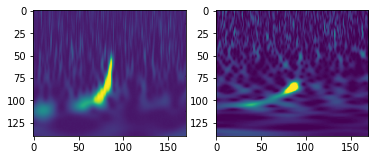

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

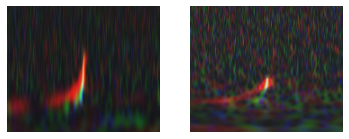

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))
axes[0].set_axis_off()
axes[1].set_axis_off()

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
y_true, tensor([int(y) for y in y_pred])

(tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4]),
 tensor([12, 12, 12, 12, 12, 12, 17, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 12, 17, 12, 12, 12, 12,
         12, 12, 12, 12, 12, 17, 12, 12, 12, 12, 12, 12, 12, 12]))

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 0.00%
Macro-averaged F1-score: 0.00%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.1

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)
channel_list = [0] * 22

In [ ]:
from model_eval import plot_top_losses_gws

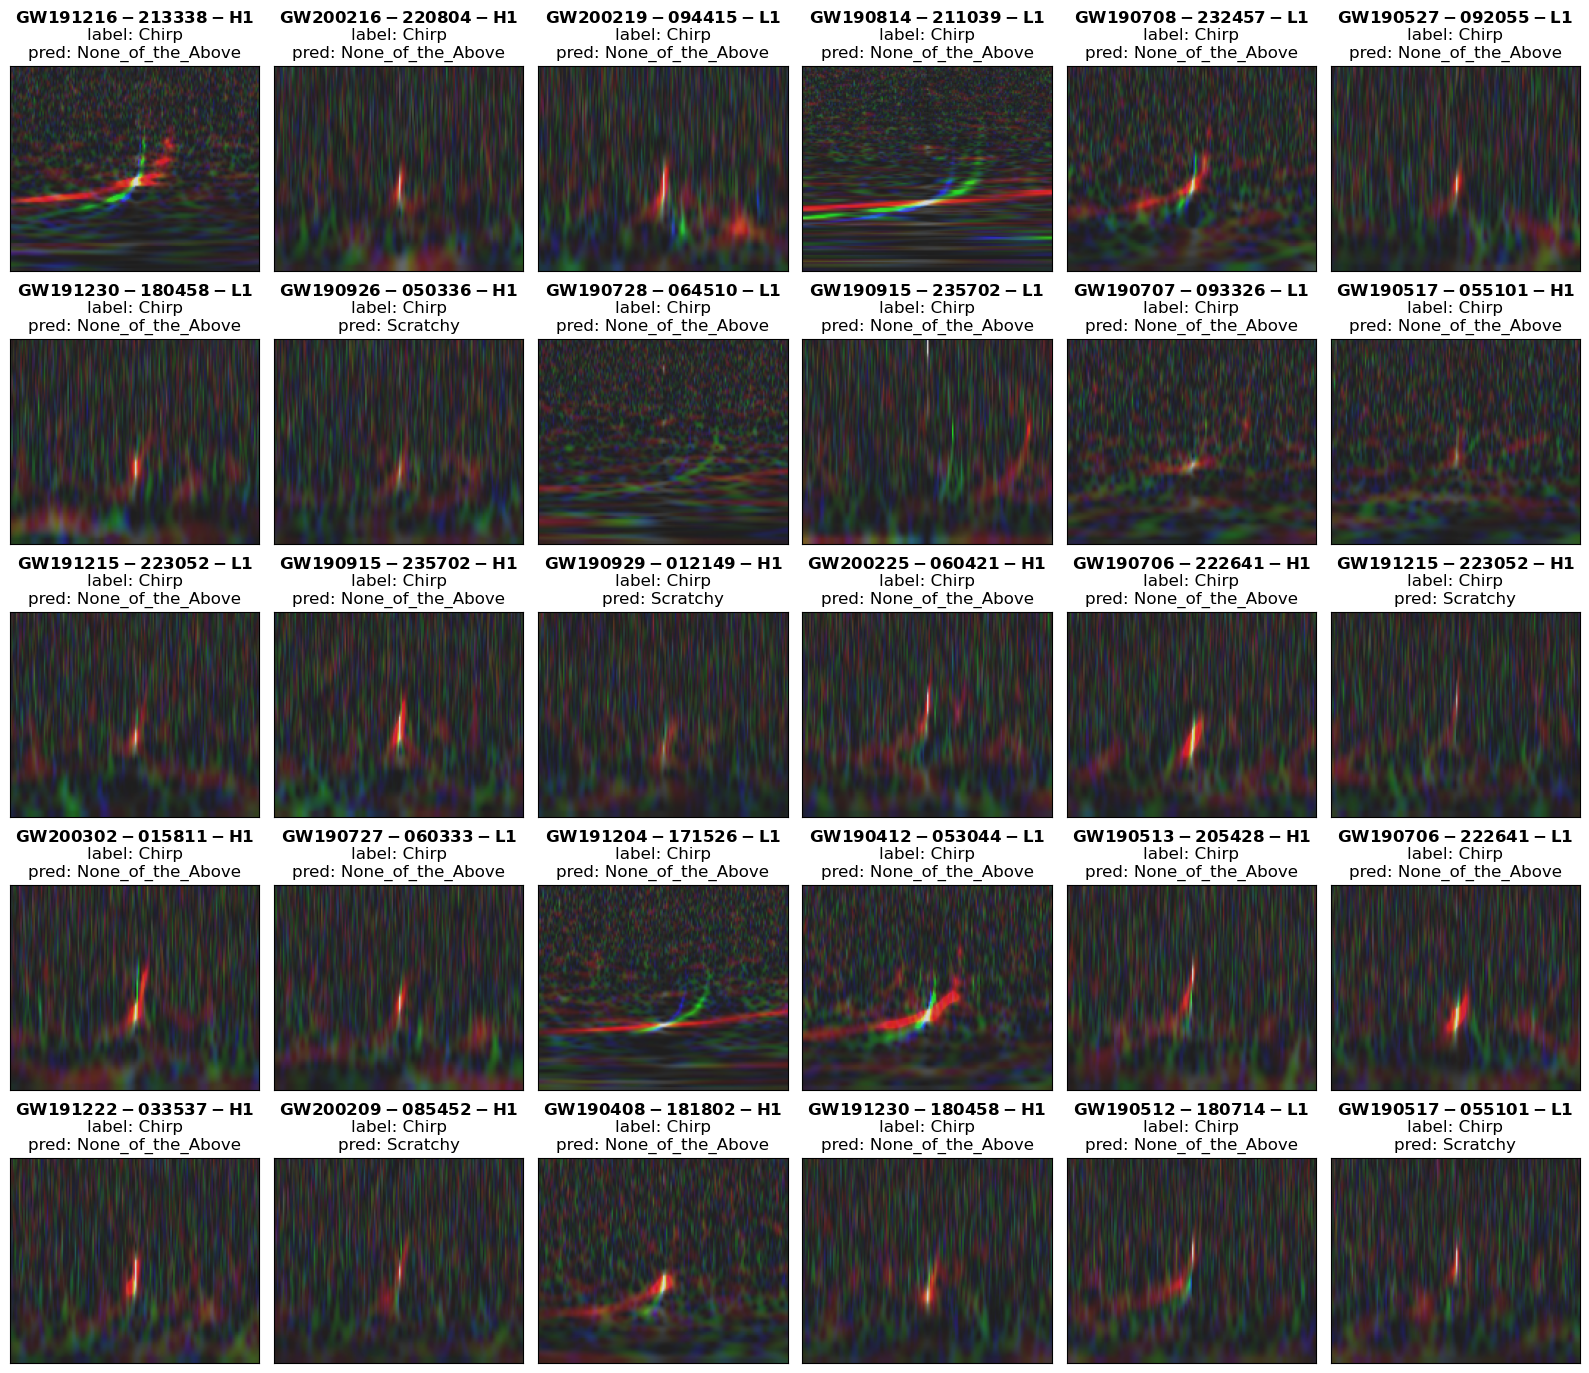

In [ ]:
#plt.rc('font', size=12)

fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=True, nrows=5, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds.pdf', dpi=600)
#fig.savefig('../figs/glitches/18_real_gws_preds.png', dpi=600)

In [ ]:
config.real_gw_version = '8'

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

<matplotlib.image.AxesImage>

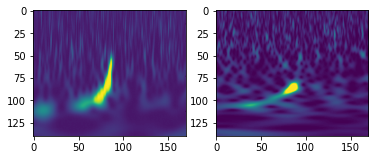

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0][0])
axes[1].imshow(dls.loaders[2].dataset[0][0][0])

<matplotlib.image.AxesImage>

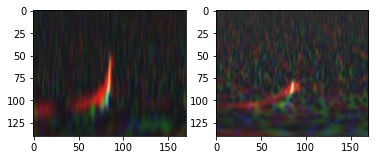

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dls.train_ds[1741][0].permute(1, 2, 0))
axes[1].imshow(dls.loaders[2].dataset[0][0].permute(1, 2, 0))

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
y_true, tensor([int(y) for y in y_pred])

(tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4]),
 tensor([12, 12, 12, 17, 12, 17, 17, 17, 17, 12, 12, 12, 12,  4, 12, 12, 12, 12,
         12, 12, 12, 17, 12, 12, 12, 12, 12, 12, 17, 17, 12, 17, 17, 12, 12, 17,
         17,  4, 12,  4,  4, 17, 12, 12, 12,  4, 17, 12, 17, 12]))

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 10.00%
Macro-averaged F1-score: 6.06%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=5)

0.24

In [ ]:
def plot_CM_chirp_line(cm, vocab=None, normalize=False, y_true=None, y_pred=None, figsize=(12, 12)):
    """Plot confusion matrix."""

    fig = plt.figure(figsize=figsize)
    plt.imshow(cm[4].reshape(1, 22), interpolation="nearest", cmap="Blues", aspect=0.85 if normalize else 1)

    tick_marks = np.arange(len(vocab))
    plt.xticks(tick_marks, vocab, rotation=45, ha="left", fontsize="large")
    
    plt.yticks([0], [vocab[4]], fontsize="large")
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] >= 0.005:
            coeff = f"{cm[i, j]:.2f}" if normalize else f"{cm[i, j]}"
            plt.text(
                j,
                0,
                coeff,
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    ax = plt.gca()
    ax.tick_params(axis="x", length=0, top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.yaxis.set_tick_params(length=0)
    ax.yaxis.set_label_position("right")
    plt.tight_layout()
    plt.ylabel("Actual Class", labelpad=30, fontsize="x-large")
    plt.xlabel("Predicted Class", labelpad=10, fontsize="x-large")
    plt.grid(False)

    return fig, ax

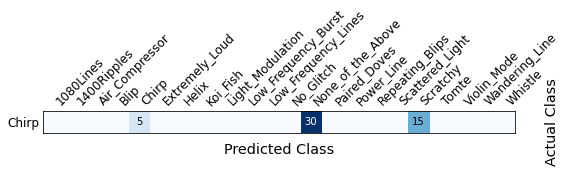

In [ ]:
fig, axes = plot_CM_chirp_line(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
from model_eval import plot_top_losses_gws

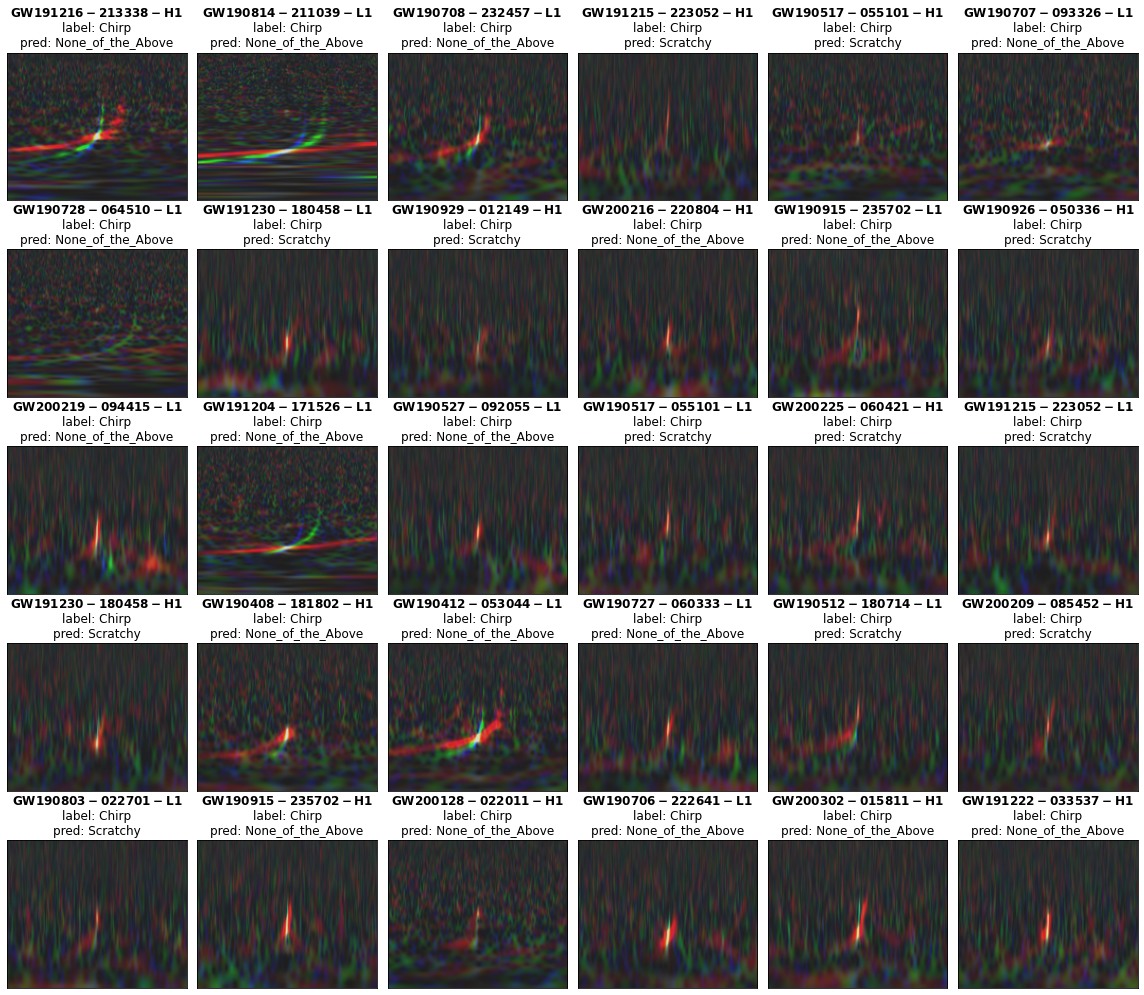

In [ ]:
fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=True, nrows=5, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds_tlbest5.png', dpi=600)

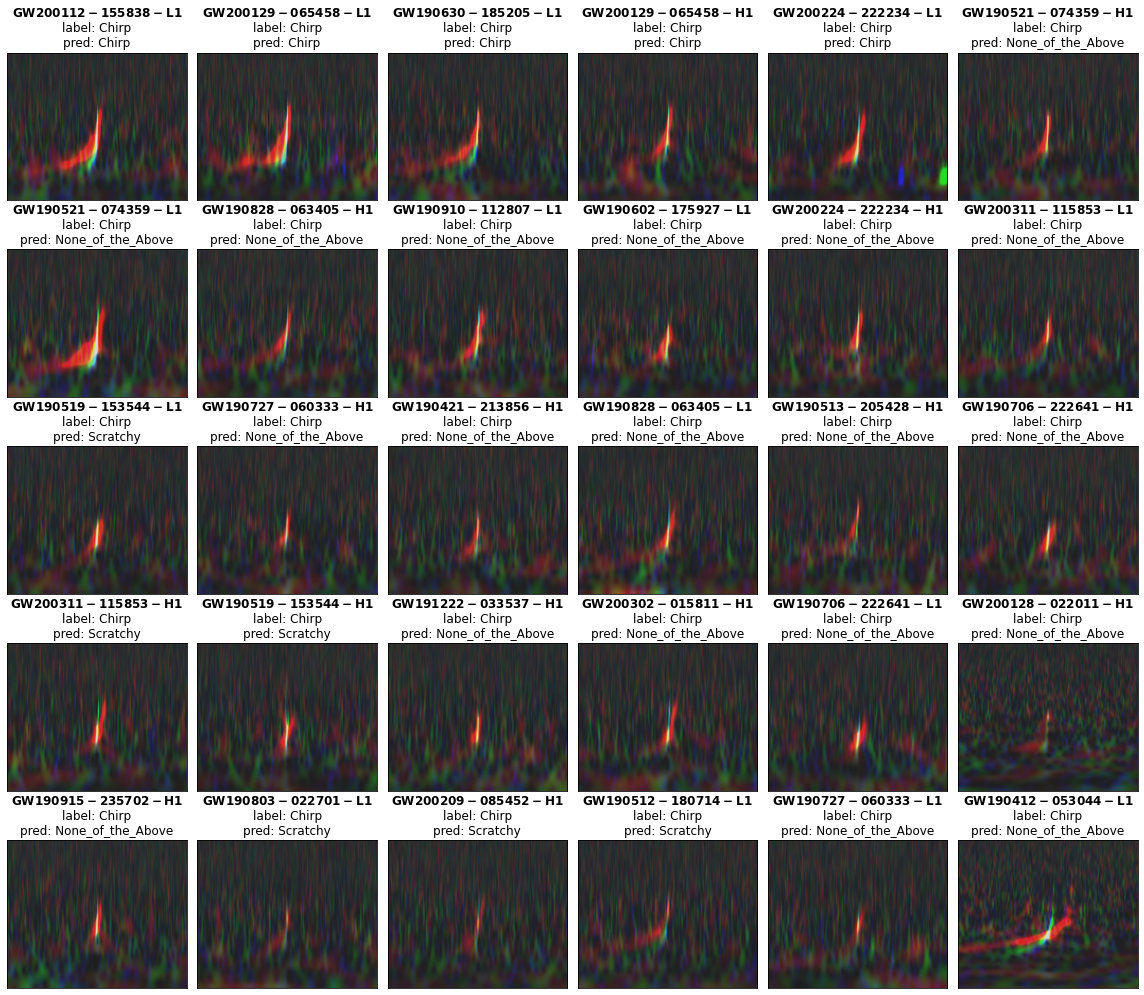

In [ ]:
fig, ax = plot_top_losses_gws(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred,
    largest=False, nrows=5, ncols=6,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 14)
)

#fig.savefig('../figs/glitches/18_real_gws_preds_tlbest5.png', dpi=600)